# Video Games EDA from Backloggd app
## Questions:
- How many games are in the application database?
- How do users rate?
- What are the top rated game genres?
- What are the most popular genres?
- What are the best and worst rated games?
- What are the most popular games?
- When are most games released (years, months)?

Data source: https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
plt.ioff()

## Import data

In [2]:
games = pd.read_csv("C:\Analiza danych\Datasety\games.csv")

## Data preprocessing

In [3]:
print(f"Dataset size: {games.shape}")
games.info()

Dataset size: (1512, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [4]:
games.describe()

,Unnamed: 0,Rating
count,1512.000000,1499.000000
mean,755.500000,3.719346
std,436.621117,0.532608
min,0.000000,0.700000
25%,377.750000,3.400000
50%,755.500000,3.800000
75%,1133.250000,4.100000
max,1511.000000,4.800000


In [5]:
games.describe(include = ["O"])

,Title,Release Date,Team,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
count,1512,1512,1511,1512,1512,1512,1511,1512,1512,1512,1512,1512
unique,1099,987,764,606,606,255,1112,1117,258,396,544,573
top,Doom,"Nov 12, 2020",['Capcom'],1.1K,1.1K,"['Adventure', 'RPG']",Minecraft focuses on allowing the player to ex...,[],12K,1.1K,1.5K,1.3K
freq,7,8,35,46,46,154,4,12,50,24,52,41


Drop unnecessary columns and make column names consistent.

In [6]:
games = games.drop(columns = ["Unnamed: 0", "Summary", "Reviews"])
games.columns = games.columns.str.replace(" ", "")

Converting date column

In [7]:
games["ReleaseDate"] = games["ReleaseDate"].str.replace("releases on TBD", "Dec 31, 2023")

In [8]:
# to date
games["ReleaseDate"] = pd.to_datetime(games["ReleaseDate"], format = "%b %d, %Y")

In [9]:
# subset
from datetime import datetime

today = datetime.now()
games = games[~(games["ReleaseDate"] > today)]

In [10]:
games["ReleaseDate"] = games["ReleaseDate"].dt.normalize()

In [11]:
# remove brackets and quote from developer names and genres
pattern = "|".join(["\[", "'", "\]"])
games["Team"] = games["Team"].str.replace(pattern, "", regex = True)
games["Genres"] = games["Genres"].str.replace(pattern, "", regex = True)

In [12]:
games.isna().sum()

Title              0
ReleaseDate        0
Team               1
Rating             8
TimesListed        0
NumberofReviews    0
Genres             0
Plays              0
Playing            0
Backlogs           0
Wishlist           0
dtype: int64

Drop missing values

In [13]:
games = games.dropna()

In [14]:
assert games["Rating"].dtype == "float64"

In [15]:
# function for convert "4.5K" like strings to float
def k_to_values(x):
    return x.replace(r"[K]+$", "", regex = True).astype(float) * \
      x.str.extract(r"[\d\.]+([K]+)", expand = False).fillna(1).replace(["K"], [10**3]).astype(float)

In [16]:
games[["TimesListed", "NumberofReviews", "Plays", "Playing", "Backlogs", "Wishlist"]] = \
  games[["TimesListed", "NumberofReviews", "Plays", "Playing", "Backlogs", "Wishlist"]].apply(k_to_values)

In [17]:
games.duplicated("Title").sum()
games[games.duplicated("Title")].sort_values(by = "Title")

,Title,ReleaseDate,Team,Rating,TimesListed,NumberofReviews,Genres,Plays,Playing,Backlogs,Wishlist
969,A Plague Tale: Innocence,2019-05-14,"Focus Entertainment, Asobo Studio",3.7,852.0,852.0,"Adventure, RPG",5400.0,202.0,2600.0,1000.0
454,A Plague Tale: Innocence,2019-05-14,"Focus Entertainment, Asobo Studio",3.7,852.0,852.0,"Adventure, RPG",5400.0,202.0,2600.0,1000.0
463,AI: The Somnium Files - Nirvana Initiative,2022-06-23,Spike ChunSoft,3.9,455.0,455.0,"Adventure, Puzzle, Visual Novel",1500.0,139.0,835.0,811.0
1270,Agar.io,2015-04-28,"Miniclip.com, Matheus Valadares",2.2,81.0,81.0,"Indie, Strategy",4400.0,8.0,40.0,12.0
626,Amnesia: The Dark Descent,2010-09-08,Frictional Games,3.5,525.0,525.0,"Adventure, Indie, Puzzle",4700.0,86.0,1800.0,407.0
...,...,...,...,...,...,...,...,...,...,...,...
481,Yakuza 3 Remastered,2018-08-09,Ryū Ga Gotoku Studios,3.3,755.0,755.0,"Adventure, RPG, Simulator",4300.0,235.0,2300.0,904.0
859,Yakuza Kiwami,2016-01-21,"Sega, Ryū Ga Gotoku Studios",3.7,1200.0,1200.0,"Adventure, Brawler, RPG",9700.0,439.0,3400.0,1000.0
393,Yakuza Kiwami,2016-01-21,"Sega, Ryū Ga Gotoku Studios",3.7,1200.0,1200.0,"Adventure, Brawler, RPG",9700.0,439.0,3400.0,1000.0
508,Yume Nikki,2004-06-26,"Kikiyama, DeNA Co., Ltd.",4.0,770.0,770.0,"Adventure, Indie",4000.0,155.0,1600.0,771.0


In [18]:
games = games.drop_duplicates("Title", keep = "first").reset_index(drop = True)

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            1083 non-null   object        
 1   ReleaseDate      1083 non-null   datetime64[ns]
 2   Team             1083 non-null   object        
 3   Rating           1083 non-null   float64       
 4   TimesListed      1083 non-null   float64       
 5   NumberofReviews  1083 non-null   float64       
 6   Genres           1083 non-null   object        
 7   Plays            1083 non-null   float64       
 8   Playing          1083 non-null   float64       
 9   Backlogs         1083 non-null   float64       
 10  Wishlist         1083 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 93.2+ KB


In [20]:
games["TimesListed"].equals(games["NumberofReviews"])

True

In [21]:
games = games.drop(columns = ["TimesListed"])

Drop ```TimesListed``` because it equals ```NumberofReviews```. 

In [22]:
# reshape and create accurate "Genre" column
games[["MainGenre", "Genre", "RestGenre"]] = games["Genres"].str.split(",", n = 2, expand = True)

In [23]:
games["Genre"] = games["Genre"].fillna(games["MainGenre"])

In [24]:
games["Genre"].value_counts(sort = True)

 RPG                    191
 Indie                  142
 Platform               137
 Shooter                 95
 Brawler                 77
Shooter                  50
 Puzzle                  40
 Strategy                37
Adventure                35
RPG                      29
Fighting                 26
Platform                 25
 Simulator               24
 Fighting                20
 Point-and-Click         20
 Arcade                  17
 Racing                  17
Racing                   14
 Visual Novel            14
Brawler                   9
Arcade                    8
Sport                     7
 Turn Based Strategy      6
 Real Time Strategy       6
 Sport                    5
 Tactical                 5
 Music                    5
Puzzle                    4
Card & Board Game         4
Simulator                 4
Music                     3
                          2
Visual Novel              1
 Card & Board Game        1
MOBA                      1
 Quiz/Trivia        

In [25]:
games["Genre"] = games["Genre"].str.lstrip()

Fill missing values

In [26]:
games.at[885, "Genre"] = "Adventure"
games.at[1048, "Genre"] = "Puzzle"

In [27]:
games = games.drop(columns = ["Genres", "MainGenre", "RestGenre"])

In [28]:
games["Genre"].isnull().sum()

0

In [29]:
games[["NumberofReviews", "Plays", "Playing", "Backlogs", "Wishlist"]] = \
  games[["NumberofReviews", "Plays", "Playing", "Backlogs", "Wishlist"]].astype(int)

In [30]:
# create columns with year and month release
games["year"] = games["ReleaseDate"].dt.year
games["month"] = games["ReleaseDate"].dt.month

## Exploratory data analysis

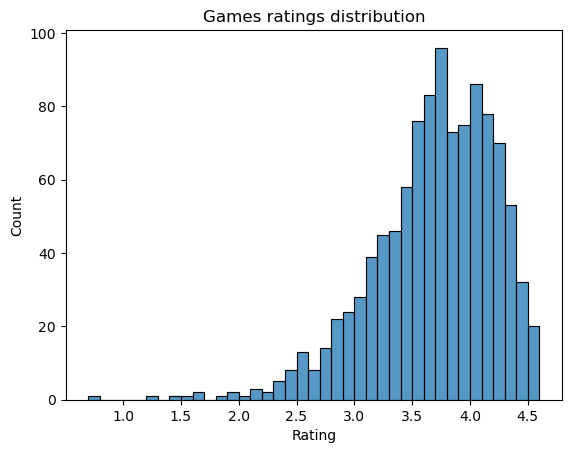

In [31]:
sns.histplot(x = "Rating", data = games, binwidth = 0.1)
plt.title("Games ratings distribution")
plt.show()

In [32]:
games["Rating"].describe()

count    1083.000000
mean        3.653924
std         0.538182
min         0.700000
25%         3.400000
50%         3.700000
75%         4.000000
max         4.600000
Name: Rating, dtype: float64

In [33]:
games["Rating"].mode()

0    3.7
Name: Rating, dtype: float64

### Game rating distribution details:
- The game ratings histogram has an asymmetric left-skew distribution;
- Dataset contains **1083** records (games). The lowest rating is **0.7** and the highest is **4.6**;
- The variable has a mean ≈ **3.65** with a standard deviation ≈ **0.54**. The most common value is **3.7**;
- 50% of games are rated higher than **3.7**, 75% are rated higher than **4** and 25% are rated lower than **3.4**;

In [34]:
games["ReleaseDate"].min(), games["ReleaseDate"].max()

(Timestamp('1980-05-22 00:00:00'), Timestamp('2023-03-17 00:00:00'))

The oldest of the games present in the application was released **22-05-1980**, and the latest **17-03-2023**.

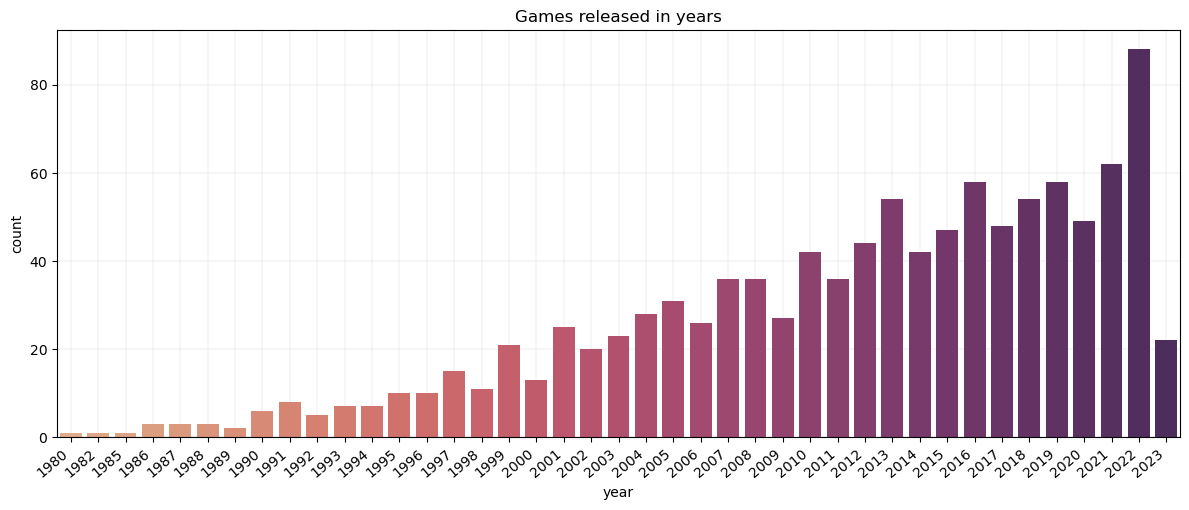

In [54]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(x = "year", data = games, palette = 'flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
ax.set_axisbelow(True)
plt.tight_layout()
plt.title("Games released in years")
plt.grid(linewidth = 0.3, alpha = 0.5)
plt.show()

In [55]:
games["year"].value_counts().head(5)

2022    88
2021    62
2019    58
2016    58
2018    54
Name: year, dtype: int64

**Most games in the application database were released in:**
- 2022
- 2021
- 2019, 2016

**The least in the 1980s**

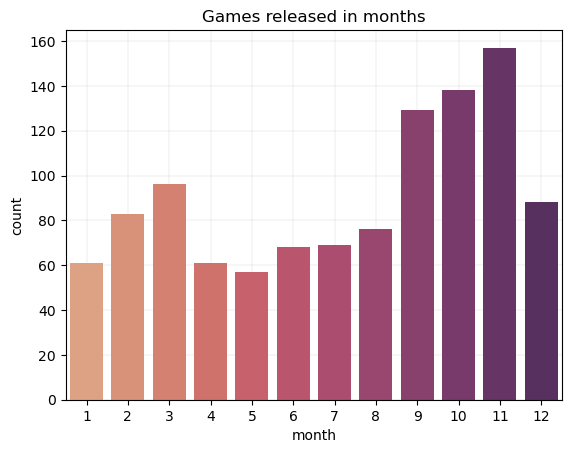

In [56]:
ax = sns.countplot(x = "month", data = games, palette = 'flare')
ax.set_axisbelow(True)
plt.grid(linewidth = 0.3, alpha = 0.5)
plt.title("Games released in months")
plt.show()

In [57]:
games["month"].value_counts().tail(4)

6    68
4    61
1    61
5    57
Name: month, dtype: int64

**Months with the most releases:**
- November
- October
- September

**Months with the fewest releases:**
- May
- January, April
- June

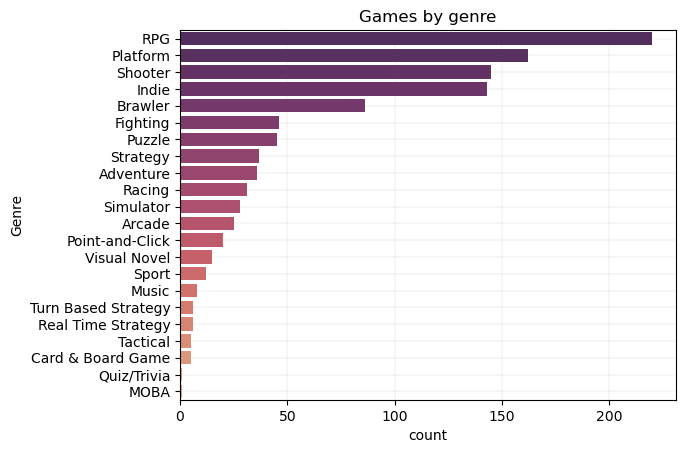

In [59]:
ax = sns.countplot(y = "Genre", data = games, order = games["Genre"].value_counts().index, palette = 'flare_r')
ax.set_axisbelow(True)
plt.grid(linewidth = 0.3, alpha = 0.5)
plt.title("Games by genre")
plt.show()

In [60]:
games["Genre"].value_counts().tail(5)

Real Time Strategy    6
Tactical              5
Card & Board Game     5
Quiz/Trivia           1
MOBA                  1
Name: Genre, dtype: int64

**Most games in genre:**
- RPG
- Platform
- Shooter   

**Least games in genre:**
- MOBA, Quiz/Trivia
- Card & Board Game, Tactical
- Real Time Strategy

In [61]:
games_genre_rating = pd.DataFrame(games.groupby("Genre")["Rating"].agg(np.mean)).reset_index()

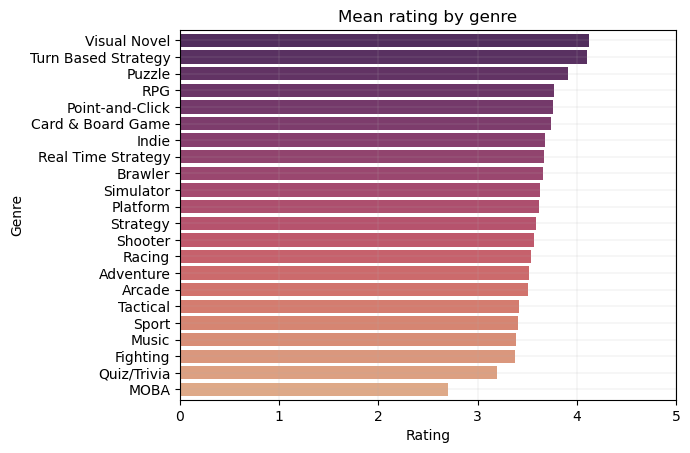

In [63]:
ax = sns.barplot(x = "Rating", y = "Genre", data = games_genre_rating,
                 order = games_genre_rating.sort_values("Rating", ascending = False)["Genre"], palette = 'flare_r')
plt.grid(linewidth = 0.3, alpha = 0.5)
plt.margins(0, 0.01)
plt.xlim(0, 5)
plt.title("Mean rating by genre")
plt.show()

**Best rated genres:**
- Visual Novel
- Turn Based Strategy
- Puzzle    

**Worst rated genres:**
- MOBA
- Quiz/Trivia
- Fighting

**Most/least popular genres:**

In [64]:
games_genre_popularity = pd.DataFrame(games.groupby("Genre")["Plays"].agg(sum)).reset_index()
games_genre_popularity.nlargest(3, "Plays")

,Genre,Plays
12,RPG,1159780
8,Platform,993428
15,Shooter,899868


In [65]:
games_genre_popularity.nsmallest(3, "Plays")

,Genre,Plays
11,Quiz/Trivia,3000
6,MOBA,4500
3,Card & Board Game,18900


### Best/worst rated games

In [67]:
games.nlargest(5, "Rating")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
28,Disco Elysium: The Final Cut,2020-05-01,ZA/UM,4.6,1100,6000,1200,5000,2700,Indie,2020,5
43,Outer Wilds,2019-05-28,"Mobius Digital, Annapurna Interactive",4.6,1800,7700,661,4800,3100,Indie,2019,5
138,Disco Elysium,2019-10-15,ZA/UM,4.6,1100,4000,478,2800,1900,RPG,2019,10
248,Umineko: When They Cry Chiru,2009-09-15,07th Expansion,4.6,324,1700,108,582,493,Visual Novel,2009,9
293,Bloodborne: The Old Hunters,2015-11-24,"FromSoftware, Sony Computer Entertainment",4.6,266,4400,68,930,616,RPG,2015,11


In [68]:
games.nsmallest(5, "Rating")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
1031,Superman: The New Superman Adventures,1999-05-31,"Titus Software, WB Games",0.7,69,859,2,76,55,Shooter,1999,5
509,Garten of Banban,2023-01-06,Euphoric Brothers,1.2,26,130,1,5,4,Indie,2023,1
999,Mega Man X7,2003-07-17,"Capcom Production Studio 3, Capcom",1.4,231,1300,6,385,113,Platform,2003,7
847,Garten of Banban 2,2023-03-03,Euphoric Brothers,1.5,16,55,0,6,3,Indie,2023,3
579,Devil May Cry 2,2003-01-25,"Capcom, Capcom Production Studio 1",1.6,620,6400,56,1600,517,Brawler,2003,1


### Most/least rated games

In [69]:
games.nlargest(5, "NumberofReviews")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,30000,2500,5000,2600,RPG,2017,3
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,17000,3800,4600,4800,RPG,2022,2
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,28000,679,4900,1800,Indie,2015,9
14,Bloodborne,2015-03-24,"FromSoftware, Sony Computer Entertainment",4.5,3400,17000,1100,5600,3300,RPG,2015,3
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,21000,2400,8300,2300,Indie,2017,2


In [70]:
games.nsmallest(5, "NumberofReviews")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
982,Better Call Saul Kart,2022-09-30,Big Trash Games,4.2,8,26,1,10,12,Racing,2022,9
847,Garten of Banban 2,2023-03-03,Euphoric Brothers,1.5,16,55,0,6,3,Indie,2023,3
956,Megami Ibunroku Persona,1996-09-20,Atlus,3.7,16,16,0,13,15,RPG,1996,9
1017,Phantom Brigade,2023-02-28,Brace Yourself Games,2.8,16,16,10,30,51,RPG,2023,2
466,Another Pokémon Game,2023-02-15,3D: Doom Daddy Digital,3.0,19,59,2,24,22,RPG,2023,2


### Most/least backlogs

In [71]:
games.nlargest(5, "Backlogs")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,21000,2400,8300,2300,Indie,2017,2
16,Yakuza 0,2015-03-12,"Ryū Ga Gotoku Studios, Sega",4.4,2700,15000,1800,6400,2000,Brawler,2015,3
1,Hades,2019-12-10,Supergiant Games,4.3,2900,21000,3200,6300,3600,Brawler,2019,12
9,NieR: Automata,2017-02-23,"PlatinumGames, Square Enix",4.3,2900,18000,1100,6200,3600,RPG,2017,2
51,The Witcher 3: Wild Hunt,2015-05-19,"WB Games, CD Projekt RED",4.3,2000,17000,1200,6100,1600,RPG,2015,5


In [72]:
games.nsmallest(5, "Backlogs")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
509,Garten of Banban,2023-01-06,Euphoric Brothers,1.2,26,130,1,5,4,Indie,2023,1
847,Garten of Banban 2,2023-03-03,Euphoric Brothers,1.5,16,55,0,6,3,Indie,2023,3
766,Fortnite: Chapter 4,2022-12-04,Epic Games,3.5,70,365,77,9,2,Shooter,2022,12
982,Better Call Saul Kart,2022-09-30,Big Trash Games,4.2,8,26,1,10,12,Racing,2022,9
956,Megami Ibunroku Persona,1996-09-20,Atlus,3.7,16,16,0,13,15,RPG,1996,9


### Most/least on wishlist

In [73]:
games.nlargest(5, "Wishlist")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,17000,3800,4600,4800,RPG,2022,2
6,Omori,2020-12-25,"OMOCAT, PLAYISM",4.2,1600,7200,1100,4500,3800,Indie,2020,12
31,NieR Replicant ver.1.22474487139...,2021-04-22,"Toylogic, Square Enix",4.2,1500,6700,880,4100,3700,RPG,2021,4
1,Hades,2019-12-10,Supergiant Games,4.3,2900,21000,3200,6300,3600,Brawler,2019,12
9,NieR: Automata,2017-02-23,"PlatinumGames, Square Enix",4.3,2900,18000,1100,6200,3600,RPG,2017,2


In [74]:
games.nsmallest(5, "Wishlist")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
766,Fortnite: Chapter 4,2022-12-04,Epic Games,3.5,70,365,77,9,2,Shooter,2022,12
847,Garten of Banban 2,2023-03-03,Euphoric Brothers,1.5,16,55,0,6,3,Indie,2023,3
509,Garten of Banban,2023-01-06,Euphoric Brothers,1.2,26,130,1,5,4,Indie,2023,1
1049,Slither.io,2016-03-25,"Lowtech Studios, Steve Howse",2.2,46,2100,1,21,4,Simulator,2016,3
253,Wordle,2021-06-21,"Josh Wardle, The New York Times",3.2,118,3000,125,26,5,Quiz/Trivia,2021,6


### Most/least popular games

In [75]:
games.nlargest(5, "Plays")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
5,Minecraft,2011-11-18,Mojang Studios,4.3,2300,33000,1800,1100,230,Simulator,2011,11
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,30000,2500,5000,2600,RPG,2017,3
23,Grand Theft Auto V,2013-09-17,"Rockstar North, Rockstar Games",3.8,2100,30000,829,3200,664,Shooter,2013,9
13,Portal 2,2011-04-18,"Valve, Electronic Arts",4.4,2900,29000,471,3900,1200,Platform,2011,4
3,Undertale,2015-09-15,"tobyfox, 8-4",4.2,3500,28000,679,4900,1800,Indie,2015,9


In [76]:
games.nsmallest(5, "Plays")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
1043,Anonymous;Code,2022-07-28,"5pb., Spike ChunSoft",4.2,40,8,1,57,156,Visual Novel,2022,7
863,Tokyo Necro,2016-01-29,"Nitroplus, JAST USA",4.6,21,14,22,50,69,Visual Novel,2016,1
956,Megami Ibunroku Persona,1996-09-20,Atlus,3.7,16,16,0,13,15,RPG,1996,9
1017,Phantom Brigade,2023-02-28,Brace Yourself Games,2.8,16,16,10,30,51,RPG,2023,2
982,Better Call Saul Kart,2022-09-30,Big Trash Games,4.2,8,26,1,10,12,Racing,2022,9


### Most/least popular games at the time of analysis

In [77]:
games.nlargest(5, "Playing")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
0,Elden Ring,2022-02-25,"Bandai Namco Entertainment, FromSoftware",4.5,3900,17000,3800,4600,4800,RPG,2022,2
1,Hades,2019-12-10,Supergiant Games,4.3,2900,21000,3200,6300,3600,Brawler,2019,12
38,Genshin Impact,2020-09-28,"miHoYo, HoYoverse",2.6,653,14000,2700,1300,280,RPG,2020,9
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"Nintendo, Nintendo EPD Production Group No. 3",4.4,4300,30000,2500,5000,2600,RPG,2017,3
4,Hollow Knight,2017-02-24,Team Cherry,4.4,3000,21000,2400,8300,2300,Indie,2017,2


In [78]:
games.nsmallest(5, "Playing")

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
847,Garten of Banban 2,2023-03-03,Euphoric Brothers,1.5,16,55,0,6,3,Indie,2023,3
956,Megami Ibunroku Persona,1996-09-20,Atlus,3.7,16,16,0,13,15,RPG,1996,9
1007,NBA Jam,1993-06-02,Midway,3.6,106,847,0,64,23,Sport,1993,6
1065,Guitar Hero 5,2009-09-01,"Activision, Neversoft Entertainment",3.2,63,1100,0,65,22,Music,2009,9
509,Garten of Banban,2023-01-06,Euphoric Brothers,1.2,26,130,1,5,4,Indie,2023,1


### Average rating in years

In [79]:
games_years_rating = pd.DataFrame(games.groupby("year")["Rating"].agg(np.mean)).reset_index()

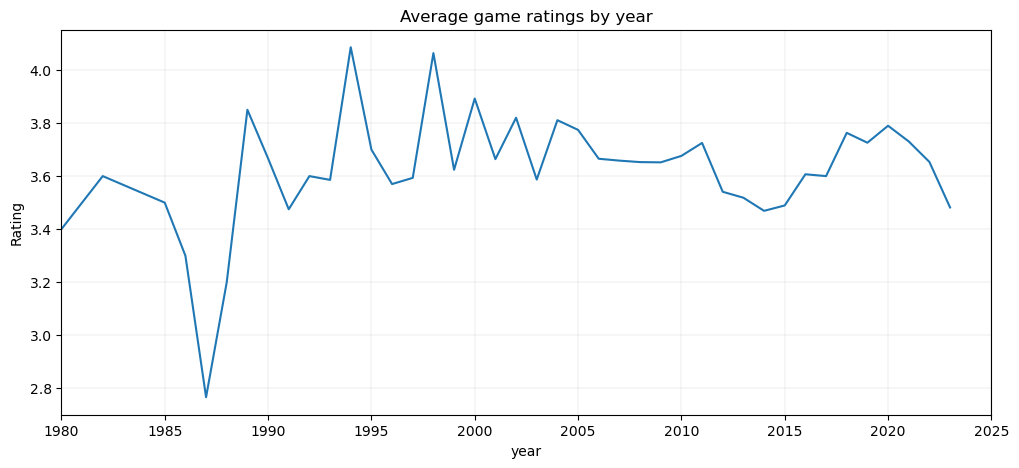

In [84]:
plt.figure(figsize = (12, 5))
ax = sns.lineplot(x = "year", y = "Rating", data = games_years_rating)
plt.xlim(1980, 2025)
plt.title("Average game ratings by year")
plt.grid(linewidth = 0.3, alpha = 0.5)
plt.show()

In [85]:
games[games["year"] == 1987]

,Title,ReleaseDate,Team,Rating,NumberofReviews,Plays,Playing,Backlogs,Wishlist,Genre,year,month
309,Zelda II: The Adventure of Link,1987-01-14,"Nintendo, Nintendo EAD",2.6,756,4500,55,1100,290,RPG,1987,1
676,Mega Man,1987-12-17,Capcom,2.8,639,5400,26,452,152,Platform,1987,12
851,Metal Gear,1987-07-13,"Ultra Games, Konami",2.9,344,1900,29,539,213,Shooter,1987,7


### Average rating in months

In [86]:
games_months_rating = pd.DataFrame(games.groupby("month")["Rating"].agg(np.mean)).reset_index()

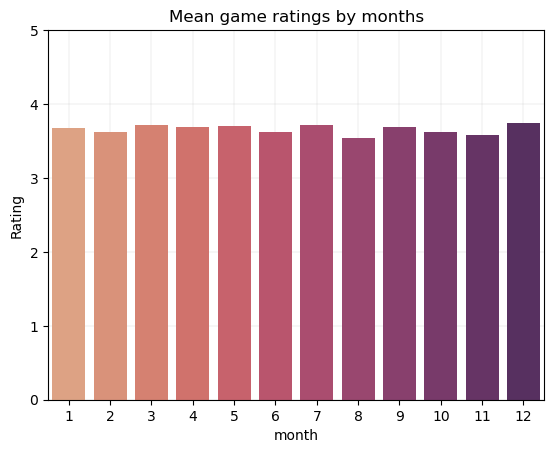

In [87]:
ax = sns.barplot(x = "month", y = "Rating", data = games_months_rating, palette = 'flare')
ax.set_axisbelow(True)
plt.grid(linewidth = 0.3, alpha = 0.5)
plt.ylim(0, 5)
plt.title("Mean game ratings by months")
plt.show()

In [88]:
games_months_rating.describe()

,month,Rating
count,12.000000,12.000000
mean,6.500000,3.660710
std,3.605551,0.063827
min,1.000000,3.544737
25%,3.750000,3.618502
50%,6.500000,3.682787
75%,9.250000,3.711006
max,12.000000,3.746591
